#**Customer Segmentation**

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


#Load the Dataset

In [3]:
dataset_path = '/content/drive/My Drive/dataset/Mall_Customers.csv'
df = pd.read_csv(dataset_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Preprocessing

In [15]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



#Visualize the Data

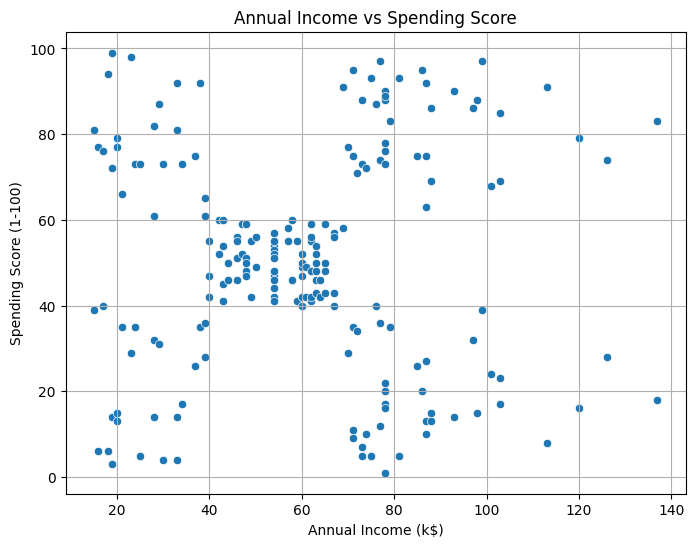

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.grid(True)
plt.show()



#Find Optimal Number of Clusters (Elbow Method)

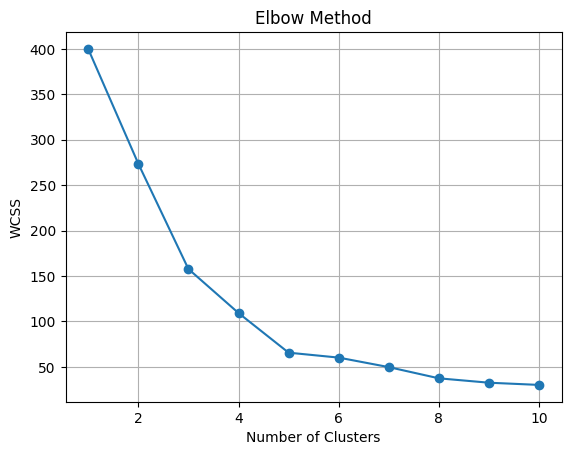

In [17]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


#Apply K-Means Clustering

In [18]:
k = 5  # Based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = labels_kmeans

#Visualize the Clusters

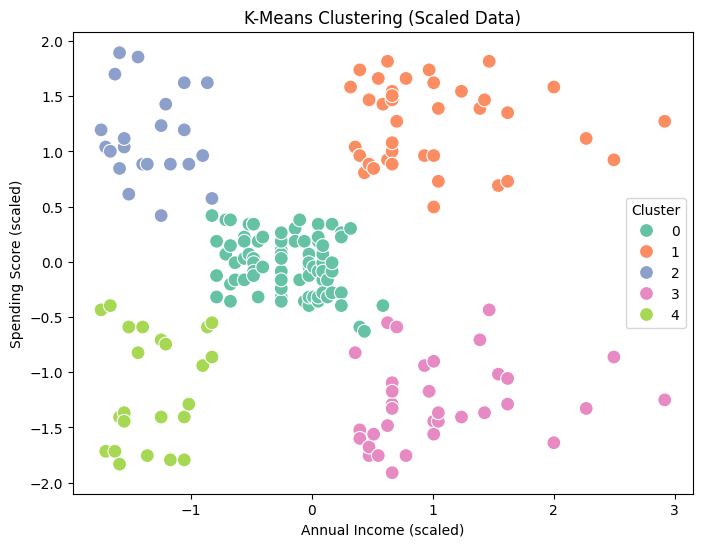

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_kmeans, palette='Set2', s=100)
plt.title('K-Means Clustering (Scaled Data)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()


#Bonus: DBSCAN Clustering

##Apply DBSCAN

In [20]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = labels_dbscan


##Visualize DBSCAN Clusters



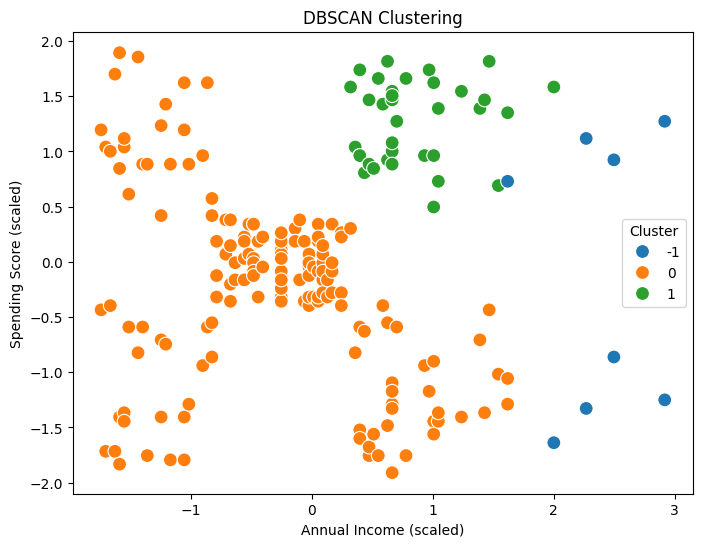

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_dbscan, palette='tab10', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()


##Silhouette Score

In [22]:
score_kmeans = silhouette_score(X_scaled, labels_kmeans)
score_dbscan = silhouette_score(X_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else "N/A"

print(f"Silhouette Score - KMeans: {score_kmeans:.2f}")
print(f"Silhouette Score - DBSCAN: {score_dbscan}")


Silhouette Score - KMeans: 0.55
Silhouette Score - DBSCAN: 0.35044619989666004


##Improve DBSCAN

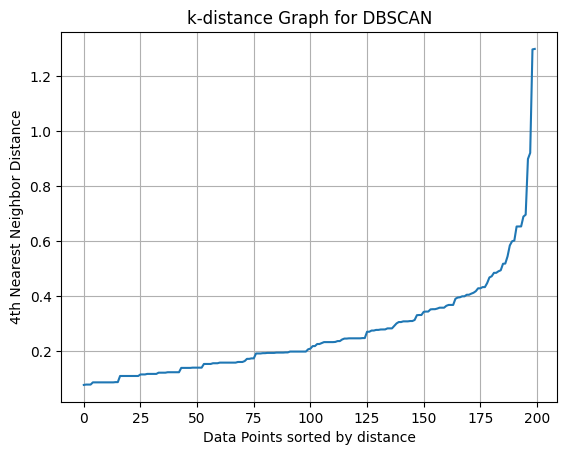

In [23]:
from sklearn.neighbors import NearestNeighbors

# Plot k-distance graph to find optimal eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])

plt.plot(distances)
plt.title('k-distance Graph for DBSCAN')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid(True)
plt.show()
